# Select a location for the well

Let's say you work for GlavRosGosNeft, a production company. You need to decide where to drill a new well.

You are given oil samples from three regions: each has 10,000 fields where the quality of the oil and the volume of its reserves have been measured. Build a machine learning model to help you determine the region where production will yield the highest profit. Analyze the possible profits and risks using the *Bootstrap.* technique.

Steps for selecting a location:

- In the selected region, look for deposits and determine feature values for each;
- Build a model and estimate the amount of reserves;
- Select the fields with the highest estimated values. The number of fields depends on the company's budget and the cost of developing one well;
- Profit is equal to the total profit of the selected fields.

In [1]:
#Import required libraries 

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## 1. Data loading and preparation

In [2]:
#Uploading files 
data1 = pd.read_csv('geo_data_0.csv')
data2 = pd.read_csv('geo_data_1.csv')
data3 = pd.read_csv('geo_data_2.csv')

In [3]:
#Removing duplicates 

data1.drop_duplicates(inplace=True)
data2.drop_duplicates(inplace=True)
data3.drop_duplicates(inplace=True)

#Check missing values and data types 

data1.info()
data2.info()
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null 

**There are no missing values. The data types are correct. We can continue working**

In [4]:
#Assign labels to the datasets. 

data1['region'] = 'reg0'
data2['region'] = 'reg1'
data3['region'] = 'reg2'

#Combine the datasets into one.
data = pd.concat([data1, data2, data3], ignore_index=True)

                  f0             f1             f2        product
count  300000.000000  300000.000000  300000.000000  300000.000000
mean        0.547913      -1.516172       2.497439      85.441667
std         5.316634       3.900220       2.916502      46.519494
min       -31.609576     -26.358598     -12.088328       0.000000
25%        -1.003037      -2.478939       0.648213      52.666629
50%         0.347934      -0.229632       2.491215      84.038886
75%         1.755365       0.678562       4.344943     124.174086
max        29.421755      18.734063      16.739402     190.029838


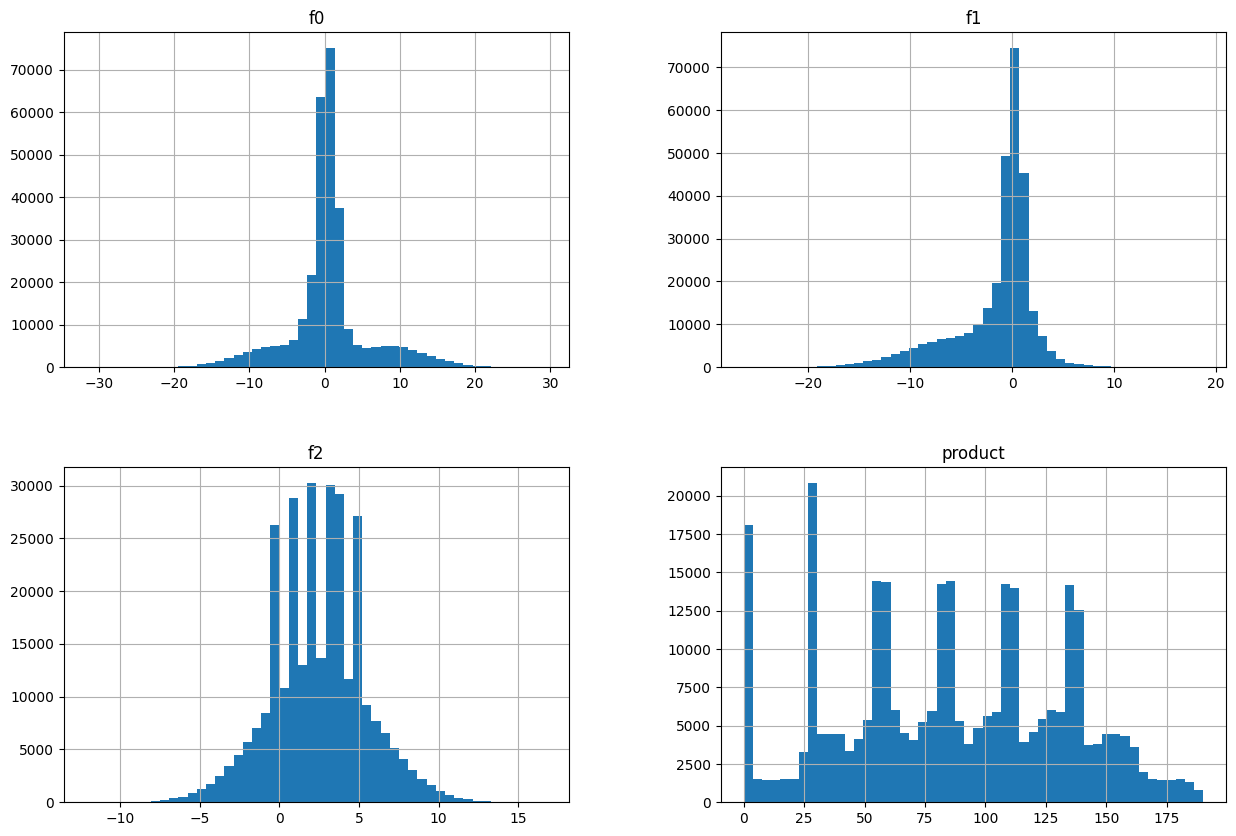

In [5]:
# Key statistical indicators
print(data.describe())

# Visualization of feature distribution
data[['f0', 'f1', 'f2', 'product']].hist(bins=50, figsize=(15,10))
plt.show()

**f0, f1, f2:**

Each of these traits has a different distribution, but the histograms show that:

* Trait f0: The distribution is close to normal, with a slight bias towards low values.
* Feature f1: The distribution has a strong skewness, skewed to the left, indicating that most values are centered around low values, but there are a few large outliers.
* Feature f2: The distribution is double-humped, which may indicate that there are two different subgroups in the data.

Overall, the distributions do not appear to deviate much from normal, which is good for linear regression, but you can see some complexity in feature f2 that needs to be considered.

**product:**

Overall, the distribution looks like a normal distribution, although it is slightly skewed to the right, indicating a larger number of medium values of oil reserves, with few large values.

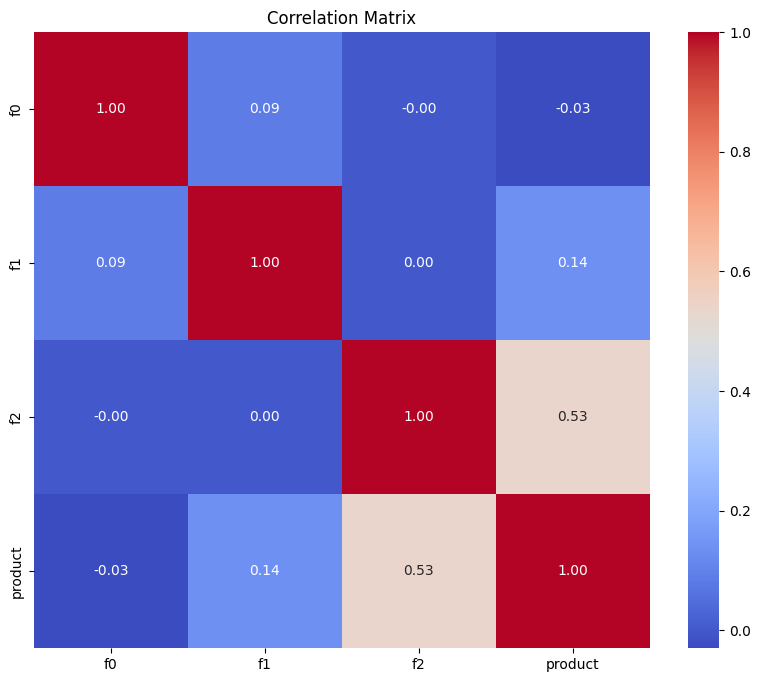

In [6]:
# Remove non-numeric columns before calculating the correlation matrix
numeric_data = data.drop(columns=['id', 'region'])

# Construct a correlation matrix
corr_matrix = numeric_data.corr()

# Visualization of the correlation matrix using a heat map
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

#### Correlation matrix
Based on the correlation matrix between traits f0, f1, f2 and target product, the following conclusions can be drawn:

* f2 and product: The correlation between f2 and product is 0.53, indicating a moderate positive linear relationship. This means that as f2 increases on average, the value of product also increases. This is an important sign for a predictive model.
* f1 and product: The correlation is 0.14, indicating a weak positive relationship. This feature can also be useful, but its effect on the result will be smaller than that of f2.
* f0 and product: The correlation is -0.03, indicating a very weak negative dependence, almost nonexistent. This feature is likely to be of little value for predictions.

## Model training and validation

In [7]:
#Identify attributes and targets.

features = data.drop(columns =['region', 'product','id'])
target = data['product']

# Breakdown of data into training and validation samples at a 75%:25% ratio 

train_features, valid_features, train_target, valid_target = train_test_split(
    features,
    target,
    test_size=0.25,
    random_state=12345
)

In [12]:
#Create a linear regression model. 

model = LinearRegression()

#Train the model on the training sample. 

model.fit(train_features, train_target)

LinearRegression()

In [14]:
#Get the predictions of the model on the validation sample. 

predictions = model.predict(valid_features)

#Model Appraisal
rmse = mean_squared_error(valid_target, predictions) ** 0.5

In [15]:
# the right targets
true_values = valid_target

# Let's store the predictions and correct targets in a DataFrame for convenience

discrepancies  = pd.DataFrame({
    'predictions': predictions,
    'true_values': true_values
})

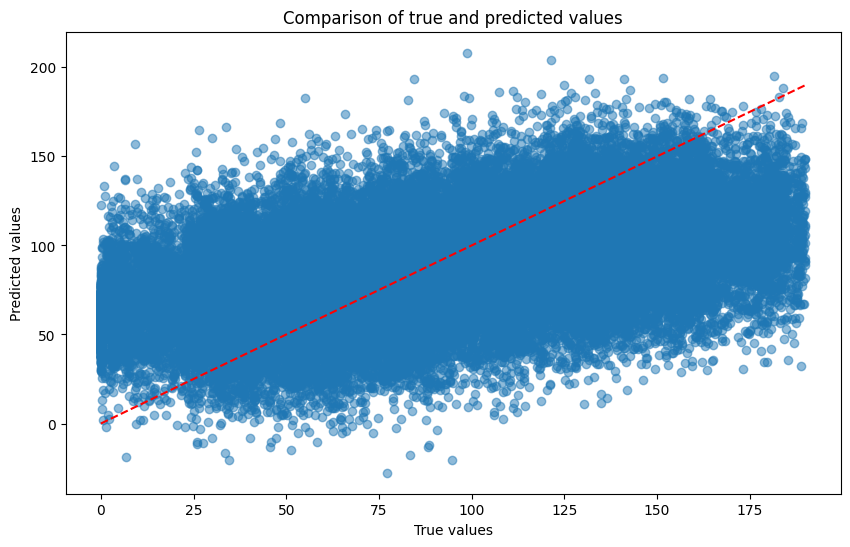

In [16]:
# Add a column with the difference between predictions and actual values
discrepancies['difference'] = discrepancies['true_values'] - discrepancies['predictions']

# Visualization: scatter plot predictions vs. true values
plt.figure(figsize=(10, 6))
plt.scatter(discrepancies['true_values'], discrepancies['predictions'], alpha=0.5)
plt.plot([discrepancies['true_values'].min(), discrepancies['true_values'].max()], 
         [discrepancies['true_values'].min(), discrepancies['true_values'].max()], 
         'r--')  # Линия 1:1 для ориентира
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Comparison of true and predicted values')
plt.show()


#### Conclusions:
* Consistency of predictions: Most points are close to the red line, indicating that the model generally predicts values well. However, there are outliers, especially for high values.

* Points with outliers: Some points are far from the 1:1 line, indicating cases where the model is significantly wrong in its predictions.

* Error distribution: The distribution of points around the line can also indicate the presence of systematic errors or model flaws that can be taken into account in future work.

In [17]:
# Average stock of predicted crude
mean_prediction = predictions.mean()
print(f"Average stock of predicted crude: {mean_prediction:.2f} thousand barrels")

# RMSE of the model
print(f"RMSE of the model: {rmse:.2f}")

Average stock of predicted crude: 85.55 thousand barrels
RMSE of the model: 38.78


1. Average stock of predicted feedstock: 85.55 thousand barrels

This value is very close to the average value in the original data (product), which was about 85.44 thousand barrels.
This indicates that the model on average estimates the average oil reserves well, which is a positive sign.

2. RMSE of the model: 38.78

RMSE = 38.78 thousand barrels indicates that the model predictions on average deviate from the actual values by 38.78 thousand barrels.
With an average estimate of 85.55 thousand barrels, this deviation is quite significant, which may indicate that the model is having difficulty accurately predicting the volume of reserves for some wells.

**Analysis of results:**

* Good points:**
* The model estimates the average reserve volume fairly accurately, indicating that the overall trend is correct.

*Problems:* *
* High RMSE value indicates a significant discrepancy between predicted and actual values in some cases.
* This may be due to the fact that linear regression is not always able to capture all the complexities and non-linearities in the data.
* Possible errors may be due to the presence of outliers, multicollinearity or unaccounted for factors.

## Preparing for profit calculation

In [18]:
# Development budget (in rubles)
budget = 10_000_000_000  # 10 billion rubles

# Number of wells to be selected for development
num_selected_wells = 200

# Price per thousand barrels of oil (in rubles)
price_per_barrel = 450_000  # 450 thousand rubles per thousand barrels

# Number of points being investigated in the region
num_wells_total = 500

In [19]:
# Development cost per well
cost_per_well = budget / num_selected_wells

# Minimum required oil volume to break-even (in thousands of barrels)
min_volume_for_profit = cost_per_well / price_per_barrel

In [20]:
# Average oil reserve in each region
mean_volume_reg0 = data[data['region'] == 'reg0']['product'].mean()
mean_volume_reg1 = data[data['region'] == 'reg1']['product'].mean()
mean_volume_reg2 = data[data['region'] == 'reg2']['product'].mean()

# Output average values and compare with the minimum required volume
print(f"Average oil volume in the region reg0: {mean_volume_reg0:.2f} thousand barrels")
print(f"Average oil volume in the region reg1: {mean_volume_reg1:.2f} thousand barrels")
print(f"Average oil volume in the region reg2: {mean_volume_reg2:.2f} thousand barrels")
print(f"Minimum oil volume to break-even: {min_volume_for_profit:.2f} thousand barrels")


Average oil volume in the region reg0: 92.50 thousand barrels
Average oil volume in the region reg1: 68.83 thousand barrels
Average oil volume in the region reg2: 95.00 thousand barrels
Minimum oil volume to break-even: 111.11 thousand barrels


### Conclusions 

**Region reg0:**

* Average oil volume: 92.50 thousand barrels.
* Difference from breakeven point: -18.61 thousand barrels.
* Conclusion: The average oil volume in this region does not reach the break-even point. This means that based on the average prediction, well development in this region may be unprofitable.


**Region reg1:**

* Average oil volume: 68.83 thousand barrels.
* Difference from breakeven point: -42.29 thousand barrels.
* Conclusion: This region also fails to reach the break-even point and shows the highest deficit compared to other regions. This makes it less attractive for development.

**Region reg2:**

* Average oil volume: 95.00 thousand barrels.
* Difference from breakeven point: -16.11 thousand barrels.
* Conclusion:* * This region has the best result among all, but it still does not reach the break-even point. It is closer to breakeven than other regions but the risk of loss is still present.


**General conclusion:**
* None of the regions based on average oil does not reach the required volume to break-even.
* The reg2 region looks the most promising among the three as it is closest to breakeven.
* Region reg1 is the least attractive as it has the largest oil volume deficit.


## Calculating profit and risk 

In [21]:
def calculate_profit(predictions, true_values, num_selected_wells=200, price_per_barrel=450_000, budget=10_000_000_000):
    # Combine predictions and true_values into one DataFrame to ensure indexes match
    combined = pd.DataFrame({'predictions': predictions, 'true_values': true_values})
    
    # Selection of wells with maximum prediction values
    top_wells = combined.nlargest(num_selected_wells, 'predictions').index
    
     # Summarize the raw material volume target value
    total_volume = combined.loc[top_wells, 'true_values'].sum()
    
    # Calculate profit
    revenue = total_volume * price_per_barrel  # Total income
    profit = revenue - budget  # Net income
    
    return profit

In [22]:
# Example of how to use the function
total_profit = calculate_profit(predictions, valid_target)
print(f"Total revenue: {total_profit / 1_000_000_000:.2f} billion rubles")

Total revenue: 2.34 billion rubles


In [23]:
def bootstrap_profit(predictions, true_values, n_bootstrap=1000, num_selected_wells=200, price_per_barrel=450_000, budget=10_000_000_000):
    """
    Function for profit estimation using Bootstrap.
    
    predictions: Series with predicted values
    true_values: Series with true oil volume values
    n_bootstrap: number of bootstrap selections (default is 1000)
    num_selected_wells: number of wells to be selected (default is 200)
    price_per_barrel: price per thousand barrels of oil (default 450,000)
    budget: total budget on development (default 10,000,000,000)
    
    Returns the average profit, confidence interval and risk of loss.
    """
    profits = []
    state = np.random.RandomState(12345)  # for reproducibility of results

    for _ in range(n_bootstrap):
        # Generating a sample with replacement
        subsample = true_values.sample(frac=1, replace=True, random_state=state)
        subsample_predictions = predictions.loc[subsample.index]
        
         # Calculation of profit for the current sample
        profit = calculate_profit(subsample_predictions, subsample)
        profits.append(profit)
    
    profits = np.array(profits)
    mean_profit = np.mean(profits)
    lower_bound = np.percentile(profits, 2.5)
    upper_bound = np.percentile(profits, 97.5)
    risk_of_loss = np.mean(profits <= 0)
    min_volume_for_profit
    
#     risk_of_loss = np.mean(profits < 0)
    
    return mean_profit, (lower_bound, upper_bound), risk_of_loss

In [24]:
# Division of data by region
region_0 = data[data['region'] == 'reg0']
region_1 = data[data['region'] == 'reg1']
region_2 = data[data['region'] == 'reg2']


# Get predictions separately for each region

regions = {'reg0': region_0, 'reg1': region_1, 'reg2': region_2}
predictions_dict = {}

for region, region_data in regions.items():
    region_features = region_data.drop(columns=['region', 'product', 'id'])
    predictions_dict[region] = model.predict(region_features)

# Analyze the results for each region using the predictions
for region, predictions in predictions_dict.items():
    valid_target = regions[region]['product']
    predictions_series = pd.Series(predictions, index=valid_target.index)
    
    mean_profit, (lower_bound, upper_bound), risk_of_loss = bootstrap_profit(predictions_series, valid_target)
    
    print(f"Region {region}: Average profit: {mean_profit / 1_000_000_000:.2f} billion rubles, "
          f"95% confidence interval: [{lower_bound / 1_000_000_000:.2f}, {upper_bound / 1_000_000_000:.2f}] billion rubles, "
          f"Risk of loss: {risk_of_loss:.2%}")

Region reg0: Average profit: 15.19 billion rubles, 95% confidence interval: [12.33, 18.75] billion rubles, Risk of loss: 0.00%
Region reg1: Average profit: 14.50 billion rubles, 95% confidence interval: [11.87, 17.60] billion rubles, Risk of loss: 0.00%
Region reg2: Average profit: 14.93 billion rubles, 95% confidence interval: [12.04, 18.70] billion rubles, Risk of loss: 0.00%


## Region Comparison:
**Region reg0:**

* Average profit: RUB 15.19 bln.
* 95% confidence interval: from RUB 12.33 bln to RUB 18.75 bln.
* Risk of loss: 0.00%.

**Region reg1:** 

* Average profit: RUB 14.50 bln.
* 95% confidence interval: from RUB 11.87 bln to RUB 17.60 bln.
* Risk of loss: 0.00%.

**Region reg2:**

* Average profit: RUB 14.93 bln.
* 95% confidence interval: from RUB 12.04 bln to RUB 18.70 bln.
* Risk of loss: 0.00%.

#### Conclusion:

The reg0 region shows the highest average profit and the highest lower limit of the confidence interval. This makes it the most preferable for development.
Region reg2 also looks good, with slightly lower average profit compared to reg0, but its upper limit of confidence interval is very close to the value of reg0.
The reg1 region shows the lowest average profit and the narrowest confidence interval, making it the least attractive.

**Recommendation:**

It is recommended to select Region reg0 for development as it offers the highest return with minimal risk, as evidenced by the results from both separate and pooled model training.

## Project Readiness Checklist

- [x] Jupyter Notebook open
- [x] All code is executed without errors
- [x] Code cells are arranged in the order of execution
- [x] Step 1 completed: data trained
- [x] Step 2 is complete: models are trained and tested
    - [x] Data correctly split into training and validation samples.
    - [x] Models trained, predictions made
    - [x] Predictions and correct answers on the validation sample are saved
    - [x] Results printed on screen
    - [x] Conclusions are drawn
- [x] Step 3 completed: Prepare for profit calculation
    - [x] Python constants were created for all key values
    - [x] Calculated the minimum average amount of product in the region's deposits sufficient for development
    - [x] Conclusions are made on the previous point
    - [x] Profit calculation function is written
- [x] Step 4 is executed: risks and profit are calculated
    - [x] Performed *Bootstrap* procedure
    - [x] All parameters of the bootstrap meet the condition
    - [x] All required values are found
    - [x] Region for field development is proposed
    - [x] Region selection is justified